# Caribbean and Hawaiian Marine (Reef) Life Image Classification Capstone Project
### Ryan Johnson

### Project Overview
As an avid snorkeler and someone who has always been interested in the unique Marine reef life ecosystem that exists within the water, I have taken many trips to explore reefs in the ocean and taken enormous amounts of images underwater. Still, I am always at a loss for what I am taking an image of; some marine life creatures I know quite well, including a green sea turtle, but others I am at a complete loss in identifying. The image classification model will create a system in which I can upload distinct sea creatures, and the model can properly identify and allow me to know what exactly I am looking at without needing a guide key to identify different underwater animals and fish that exist. The image classification model is simply a way to speed up my comprehension of the underwater creatures and ecosystems I have explored and identify what the sea creatures are when snorkeling in the ocean with my GoPro when taking enormous amounts of pictures and videos.

### Problem Statement
My capstone project aims to create a Caribbean and Hawaiian Marine (reef) life Single-label image classification model to identify different sea creatures, including sea animals and fish. 

### Caribbean and Hawaiian Marine (Reef) Life Image Classification (Single Label)
The five sea creatures and fish labels I have include:
* Cuttlefish
* Eagle ray
* Green Sea Turtle
* Reef triggerfish
* Stingray

Each of these classes of sea creatures has over 65 images and are a distinct sea creature for creating the single-label image classification model. I took these pictures using my GoPro when snorkeling in the Caribbean and Hawaiian oceans from 2017 to 2025. For my GoPro I have filter lens that help me take a clear image underwater, that is my some of the images have a warming color tone than others. I have 1162 images in total. 


When creating the image classification dataset and annotating the images and videos into each of the label classes there are:
* Cuttlefish- 65 images
* Eagle ray- 366 images
* Green Sea Turtle- 482 images
* Reef triggerfish- 67 images
* Stingray- 182 images

The images are comprised orginal images and videos stripped to 1 image(frame) per second.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# tensorflow
import tensorflow as tf

# to build dataset in tensorflow need use datasets
from tensorflow.keras import datasets, layers, models

import torch
import torchvision
#import torchvision.transforms as transforms

import sys
import os
from os import listdir

import PIL # Python Imaging Library
from IPython.display import display # Display Images
import pathlib

import random # to set the seed

# confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, classification_report


### Using Roboflow's API to Download Dataset into GitHub

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="") # removed api_key becuase it is tied to my Roboflow account.
project = rf.workspace("protozoa").project("caribbean-and-hawaii-marine-life")
version = project.version(1)
dataset = version.download("folder")           

### Caribbean-and-Hawaii-Marine-Life-1 version 1 dataset path

In [2]:
# Caribbean-and-Hawaii-Marine-Life-1 version 1 dataset path
# dataset_path = dataset.location  # folder where the dataset is downloaded

# Needed to put 'r' in front of dataset path to work correctly
dataset_path = r'C:\Users\rthom\Documents\GitHub\Caribbean-and-Hawaiian-Marine-Reef-Life-Image-Classification\Caribbean-and-Hawaii-Marine-Life-1'

print(dataset_path)

# to remove error use 'r'
# SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape


C:\Users\rthom\Documents\GitHub\Caribbean-and-Hawaiian-Marine-Reef-Life-Image-Classification\Caribbean-and-Hawaii-Marine-Life-1


### Train, Valid, and Test Dataset Paths

In [3]:
folder_paths_tvt = []
for root, directs, files in os.walk(dataset_path):
    for direct in directs:
        folder_paths_tvt.append(os.path.join(root, direct))

# Print the folder paths
for folder_path in folder_paths_tvt[0:3]:
    print(folder_path)

C:\Users\rthom\Documents\GitHub\Caribbean-and-Hawaiian-Marine-Reef-Life-Image-Classification\Caribbean-and-Hawaii-Marine-Life-1\test
C:\Users\rthom\Documents\GitHub\Caribbean-and-Hawaiian-Marine-Reef-Life-Image-Classification\Caribbean-and-Hawaii-Marine-Life-1\train
C:\Users\rthom\Documents\GitHub\Caribbean-and-Hawaiian-Marine-Reef-Life-Image-Classification\Caribbean-and-Hawaii-Marine-Life-1\valid


#### Train Data Path

In [4]:
train_data_path = folder_paths_tvt[1]
print(f'Train Data Path:\n{train_data_path}')

Train Data Path:
C:\Users\rthom\Documents\GitHub\Caribbean-and-Hawaiian-Marine-Reef-Life-Image-Classification\Caribbean-and-Hawaii-Marine-Life-1\train


#### Valid Data Path

In [5]:
valid_data_path = folder_paths_tvt[2]
print(f'Valid Data Path:\n{valid_data_path}')

Valid Data Path:
C:\Users\rthom\Documents\GitHub\Caribbean-and-Hawaiian-Marine-Reef-Life-Image-Classification\Caribbean-and-Hawaii-Marine-Life-1\valid


#### Test Data Path

In [6]:
test_data_path = folder_paths_tvt[0]
print(f'Test Data Path:\n{test_data_path}')

Test Data Path:
C:\Users\rthom\Documents\GitHub\Caribbean-and-Hawaiian-Marine-Reef-Life-Image-Classification\Caribbean-and-Hawaii-Marine-Life-1\test


### Listed Directories from the Dataset (Folders for Each of the Classes)

In [7]:
img_dir = dataset_path

In [8]:
total_files = 0
# root, directory, files in the path of the folder
for root, direc, files in os.walk(str(img_dir)):
    
    # spliting up the levels of folder files within the main folder
    folder_levels = root.replace(str(img_dir), '').count(os.sep)
    
    # adding spacing to directories
    spacing = ' ' * (folder_levels) * 5
    
    print(f'{spacing}{os.path.basename(root)}/ ({len(files)} files)')
    total_files += len(files)
    
print()   
print(f'There are {total_files -2} images in this dataset')

Caribbean-and-Hawaii-Marine-Life-1/ (2 files)
     test/ (0 files)
          Cuttlefish/ (6 files)
          Eagle ray/ (36 files)
          Green Sea Turtle/ (48 files)
          Reef triggerfish/ (7 files)
          Stingray/ (17 files)
     train/ (0 files)
          Cuttlefish/ (46 files)
          Eagle ray/ (260 files)
          Green Sea Turtle/ (337 files)
          Reef triggerfish/ (47 files)
          Stingray/ (131 files)
     valid/ (0 files)
          Cuttlefish/ (13 files)
          Eagle ray/ (70 files)
          Green Sea Turtle/ (97 files)
          Reef triggerfish/ (13 files)
          Stingray/ (34 files)

There are 1162 images in this dataset


## Creating training validation, and test datasets for Caribbean and Hawaiian Marine Life Images

### Setting the seed to reproduce results

In [9]:
set_seed = 123

os.environ['PYTHONHASHSEED']=str(set_seed)
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
random.seed(set_seed)
np.random.seed(set_seed)
tf.random.set_seed(set_seed)

### Loading and Preprocessing Caribbean and Hawaiian Marine Life Images

In [10]:
batch_size = 32
image_height = 500 # the image is (500, 500)
image_width = 500
channels = 3 # Channel is (3) for RGB colors

In [15]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
  train_data_path, # train folder contains all the folders contaning the 5 marine life creatures
  labels='inferred', # labels are generated from the directory structure
  label_mode='int', 
    
    # 'categorical' causes errors needs to be 'int'
    
    #'int': means that the labels are encoded as integers (e.g. for sparse_categorical_crossentropy loss).
    # 'categorical' means that the labels are encoded as a categorical vector (e.g. for categorical_crossentropy loss).
    
  #validation_split= train_test_split,
  #subset="training",
  seed= set_seed, # seed is 123
  image_size=(image_height, image_width),
  batch_size=batch_size
)

Found 821 files belonging to 5 classes.


In [12]:
valid_data = tf.keras.preprocessing.image_dataset_from_directory(
  valid_data_path, # valid folder contains all the folders contaning the 5 marine life creatures
  labels='inferred', # labels are generated from the directory structure
  label_mode='int', 
    # 'categorical' causes errors needs to be 'int'
    
    #'int': means that the labels are encoded as integers (e.g. for sparse_categorical_crossentropy loss).
    # 'categorical' means that the labels are encoded as a categorical vector (e.g. for categorical_crossentropy loss).
    
  seed= set_seed, # seed is 123
  image_size=(image_height, image_width),
  batch_size=batch_size
)

Found 227 files belonging to 5 classes.


In [13]:
test_data = tf.keras.preprocessing.image_dataset_from_directory(
  test_data_path, # test folder contains all the folders contaning the 5 marine life creatures
  labels='inferred', # labels are generated from the directory structure
  label_mode='int', 
    # 'categorical' causes errors needs to be 'int'
    
    #'int': means that the labels are encoded as integers (e.g. for sparse_categorical_crossentropy loss).
    # 'categorical' means that the labels are encoded as a categorical vector (e.g. for categorical_crossentropy loss).
    
  seed= set_seed, # seed is 123
  image_size=(image_height, image_width), # 500, 500
  batch_size=batch_size
)

Found 114 files belonging to 5 classes.


### Caribbean and Hawaiian Marine Life Images Label Classes

In [19]:
car_hawai_labels = train_data.class_names
print(f'The Classes for the Caribbean and Hawaiian Marine Life Images are:\n{car_hawai_labels}')

The Classes for the Caribbean and Hawaiian Marine Life Images are:
['Cuttlefish', 'Eagle ray', 'Green Sea Turtle', 'Reef triggerfish', 'Stingray']


### Training Images of Caribbean and Hawaiian Marine Life

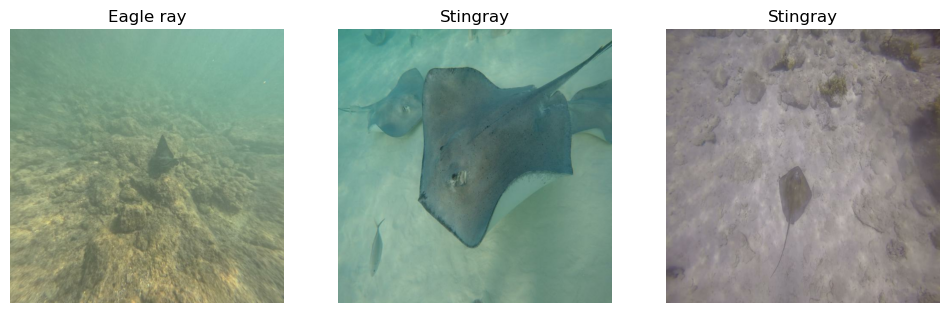

In [37]:
plt.figure(figsize=(12, 12))
for imag, lab in train_data.take(1): # take(1) for the 1 batch (32 images)
    for i in range(3):
        ax = plt.subplot(2, 3, i + 1) # better spacing
        plt.axis("off") # not axis
        plt.imshow(imag[i].numpy().astype("uint16"))
        plt.title(car_hawai_labels[lab[i]])

In [22]:
for imag, lab in train_data.take(1):
    print(f'Image Batch Shape: {imag.shape}\nLabel Batch Shape: {lab.shape}')
    
# Image Batch Shape:
# 1. number of images per batch (32)
# 2. Height of the image (500)
# 3. Width of the image (500)
# 4. Channel is (3) for RGB colors

Image Batch Shape: (32, 500, 500, 3)
Label Batch Shape: (32,)
